# Cyclone Prediction and Analysis

### Importing packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import joblib
from sklearn.model_selection import train_test_split


### Reading the Dataset using Pandas and Manipulating them

In [3]:
file = pd.read_csv("cyclone prediction datas.csv")
file 

Cyclone_ID  Year  Month  Max_Wind_Speed_knots  Min_Pressure_hPa  \
0      CYC0001  2018      5                    71               924   
1      CYC0002  2008      7                    98               972   
2      CYC0003  1994      4                    49              1000   
3      CYC0004  2022      6                   125               901   
4      CYC0005  1987      4                    70               879   
..         ...   ...    ...                   ...               ...   
395    CYC0396  2016      6                   133               988   
396    CYC0397  2012      2                    82               898   
397    CYC0398  1987      2                   151               944   
398    CYC0399  2023      2                   148               985   
399    CYC0400  2023     11                    27               901   

     Sea_Surface_Temp_C  Humidity_%  Rainfall_mm  Duration_days  \
0                 24.66          72        484.3              4   
1                 29.44          93        269.8              6   
2                 29.24          51        117.8             12   
3                 26.19          87        204.1             13   
4                 31.61          66        236.0              3   
..                  ...         ...          ...            ...   
395               29.21          51        250.4              7   
396               28.26          78        405.0             10   
397               26.59          70        337.8              4   
398               26.66          64        354.4              6   
399               29.36          76        109.3             11   

     Affected_Population  Economic_Damage_USD_Million        Category  
0                 422280                     43869.01      Category 3  
1                 910245                     48718.87      Category 3  
2                 342207                      1385.68      Category 3  
3                1231746                     41992.41      Category 5  
4                3290791                     37591.09  Tropical Storm  
..                   ...                          ...             ...  
395              4301915                     27338.80  Tropical Storm  
396              4968514                     28774.72      Category 2  
397              1637675                      1116.85      Category 4  
398               707673                     47256.26  Tropical Storm  
399               802849                     34834.40      Category 1  

[400 rows x 12 columns]

In [4]:
print("======= Information of Dataset =======")
print(file.info())

======= Information of Dataset =======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cyclone_ID                   400 non-null    object 
 1   Year                         400 non-null    int64  
 2   Month                        400 non-null    int64  
 3   Max_Wind_Speed_knots         400 non-null    int64  
 4   Min_Pressure_hPa             400 non-null    int64  
 5   Sea_Surface_Temp_C           400 non-null    float64
 6   Humidity_%                   400 non-null    int64  
 7   Rainfall_mm                  400 non-null    float64
 8   Duration_days                400 non-null    int64  
 9   Affected_Population          400 non-null    int64  
 10  Economic_Damage_USD_Million  400 non-null    float64
 11  Category                     400 non-null    object 
dtypes: float64(3), int64(7), object(2)
memo

In [5]:
print("======= Dataset Description =======")
print(file.describe())

======= Dataset Description =======
              Year       Month  Max_Wind_Speed_knots  Min_Pressure_hPa  \
count   400.000000  400.000000            400.000000        400.000000   
mean   2002.692500    6.367500             98.880000        940.892500   
std      13.023901    3.536766             46.666208         43.674875   
min    1980.000000    1.000000             20.000000        871.000000   
25%    1992.000000    3.000000             57.750000        904.000000   
50%    2003.500000    6.000000             97.000000        937.000000   
75%    2014.000000   10.000000            138.250000        978.000000   
max    2024.000000   12.000000            179.000000       1019.000000   

       Sea_Surface_Temp_C  Humidity_%  Rainfall_mm  Duration_days  \
count          400.000000  400.000000   400.000000     400.000000   
mean            27.957125   73.500000   272.034500       7.420000   
std              2.304278   13.785685   132.763892       4.126277   
min             24.04

In [6]:
print("======= Null Value =======")
print(file.isnull().sum())

======= Null Value =======
Cyclone_ID                     0
Year                           0
Month                          0
Max_Wind_Speed_knots           0
Min_Pressure_hPa               0
Sea_Surface_Temp_C             0
Humidity_%                     0
Rainfall_mm                    0
Duration_days                  0
Affected_Population            0
Economic_Damage_USD_Million    0
Category                       0
dtype: int64


In [7]:
data = file.dropna()
data

Cyclone_ID  Year  Month  Max_Wind_Speed_knots  Min_Pressure_hPa  \
0      CYC0001  2018      5                    71               924   
1      CYC0002  2008      7                    98               972   
2      CYC0003  1994      4                    49              1000   
3      CYC0004  2022      6                   125               901   
4      CYC0005  1987      4                    70               879   
..         ...   ...    ...                   ...               ...   
395    CYC0396  2016      6                   133               988   
396    CYC0397  2012      2                    82               898   
397    CYC0398  1987      2                   151               944   
398    CYC0399  2023      2                   148               985   
399    CYC0400  2023     11                    27               901   

     Sea_Surface_Temp_C  Humidity_%  Rainfall_mm  Duration_days  \
0                 24.66          72        484.3              4   
1                 29.44          93        269.8              6   
2                 29.24          51        117.8             12   
3                 26.19          87        204.1             13   
4                 31.61          66        236.0              3   
..                  ...         ...          ...            ...   
395               29.21          51        250.4              7   
396               28.26          78        405.0             10   
397               26.59          70        337.8              4   
398               26.66          64        354.4              6   
399               29.36          76        109.3             11   

     Affected_Population  Economic_Damage_USD_Million        Category  
0                 422280                     43869.01      Category 3  
1                 910245                     48718.87      Category 3  
2                 342207                      1385.68      Category 3  
3                1231746                     41992.41      Category 5  
4                3290791                     37591.09  Tropical Storm  
..                   ...                          ...             ...  
395              4301915                     27338.80  Tropical Storm  
396              4968514                     28774.72      Category 2  
397              1637675                      1116.85      Category 4  
398               707673                     47256.26  Tropical Storm  
399               802849                     34834.40      Category 1  

[400 rows x 12 columns]

In [8]:
# No. of Row and columns
file.shape

(400, 12)

In [9]:
# names of columns
file.columns

Index(['Cyclone_ID', 'Year', 'Month', 'Max_Wind_Speed_knots',
       'Min_Pressure_hPa', 'Sea_Surface_Temp_C', 'Humidity_%', 'Rainfall_mm',
       'Duration_days', 'Affected_Population', 'Economic_Damage_USD_Million',
       'Category'],
      dtype='object')

_________________________________________________________
30% (Week: 1)
_________________________________________________________



### Univiated Analysis

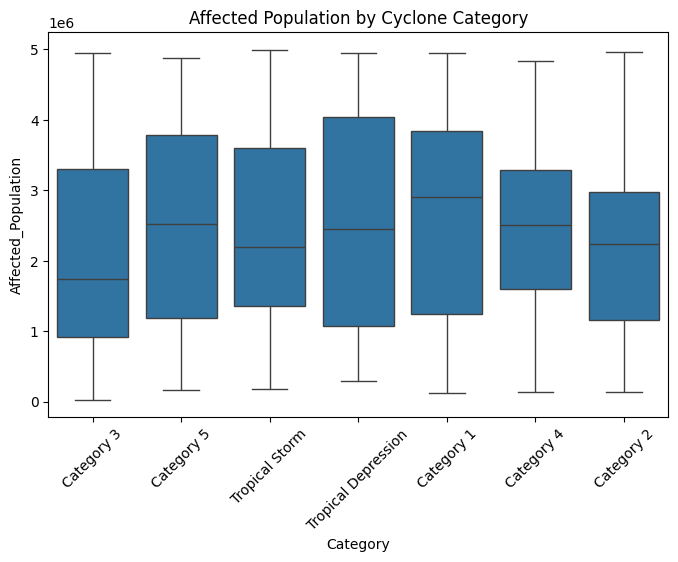

In [10]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Affected_Population', data=file)
plt.title('Affected Population by Cyclone Category')
plt.xticks(rotation=45)
plt.show()


### Using countplot() for Categorical Data

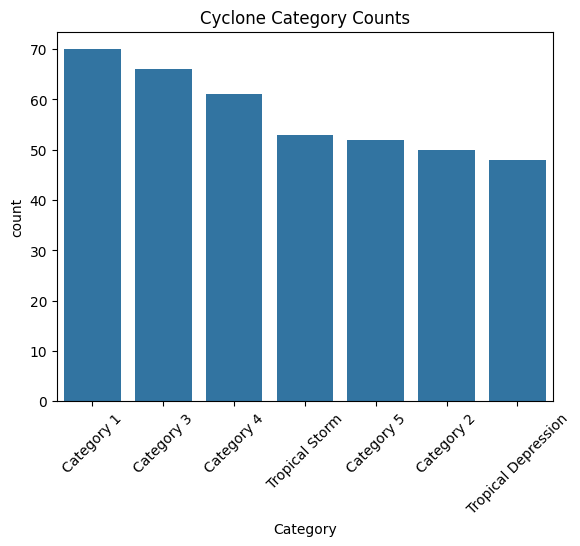

In [11]:

sns.countplot(x='Category', data=file, order=file['Category'].value_counts().index)
plt.title('Cyclone Category Counts')
plt.xticks(rotation=45)
plt.show()


In [12]:
file.columns

Index(['Cyclone_ID', 'Year', 'Month', 'Max_Wind_Speed_knots',
       'Min_Pressure_hPa', 'Sea_Surface_Temp_C', 'Humidity_%', 'Rainfall_mm',
       'Duration_days', 'Affected_Population', 'Economic_Damage_USD_Million',
       'Category'],
      dtype='object')

### Using Histograms to plot all the columns in Dataset

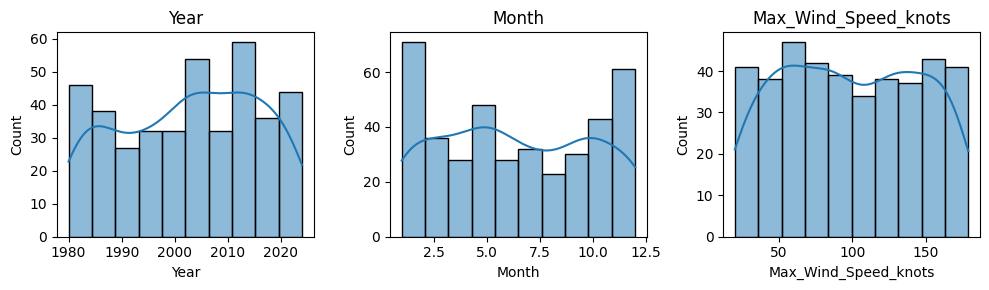

In [13]:
num_col=['Year', 'Month', 'Max_Wind_Speed_knots']
fig, axes= plt.subplots(1,3, figsize=(10,3))
for ax, col in zip(axes, num_col):
    sns.histplot(file[col], kde= True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()    

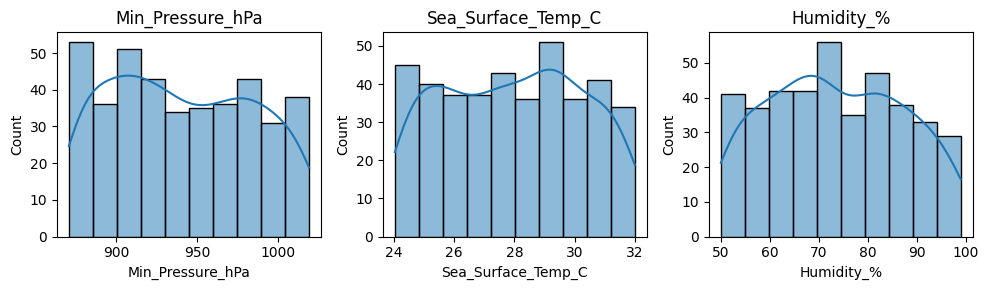

In [14]:
num_col=['Min_Pressure_hPa', 'Sea_Surface_Temp_C', 'Humidity_%']
fig, axes= plt.subplots(1,3, figsize=(10,3))
for ax, col in zip(axes, num_col):
    sns.histplot(file[col], kde= True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()    

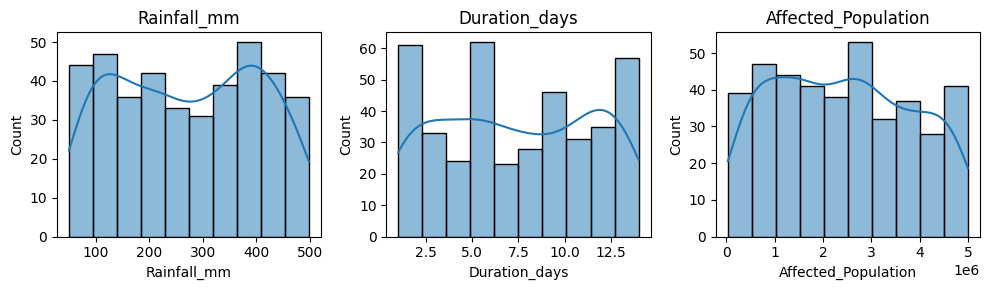

In [15]:
num_col=['Rainfall_mm', 'Duration_days', 'Affected_Population']
fig, axes= plt.subplots(1,3, figsize=(10,3))
for ax, col in zip(axes, num_col):
    sns.histplot(file[col], kde= True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()    

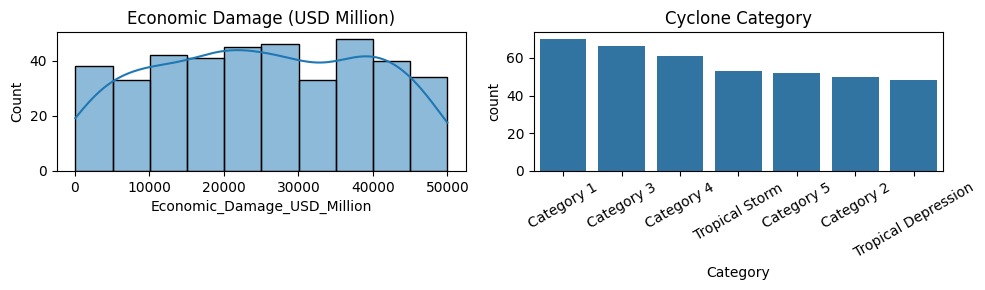

In [16]:
num_col = ['Economic_Damage_USD_Million', 'Category']

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(file['Economic_Damage_USD_Million'], kde=True, ax=axes[0])
axes[0].set_title('Economic Damage (USD Million)')


sns.countplot(x='Category', data=file, ax=axes[1], order=file['Category'].value_counts().index)
axes[1].set_title('Cyclone Category')
axes[1].tick_params(axis='x', rotation=30)  # Rotate labels for readability

plt.tight_layout()
plt.show()
 

### Correlation Matrix for numerical features

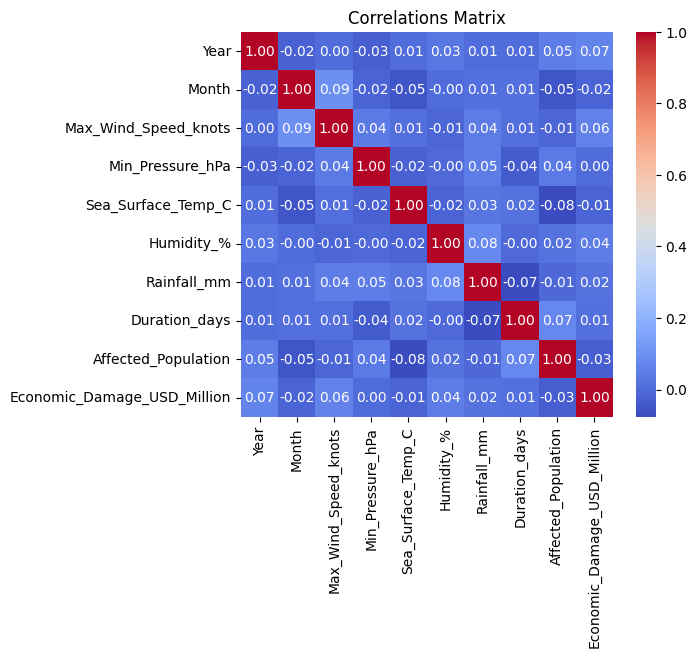

In [17]:
num_col = ['Year','Month','Max_Wind_Speed_knots','Min_Pressure_hPa',
            'Sea_Surface_Temp_C','Humidity_%','Rainfall_mm','Duration_days',
            'Affected_Population','Economic_Damage_USD_Million']
plt.figure(figsize=(6,5))
sns.heatmap(file[num_col].corr(), fmt=".2f", annot=True, cmap='coolwarm')
plt.title("Correlations Matrix")
plt.show()

### Pairplot for numerical features coloured by Affected Population

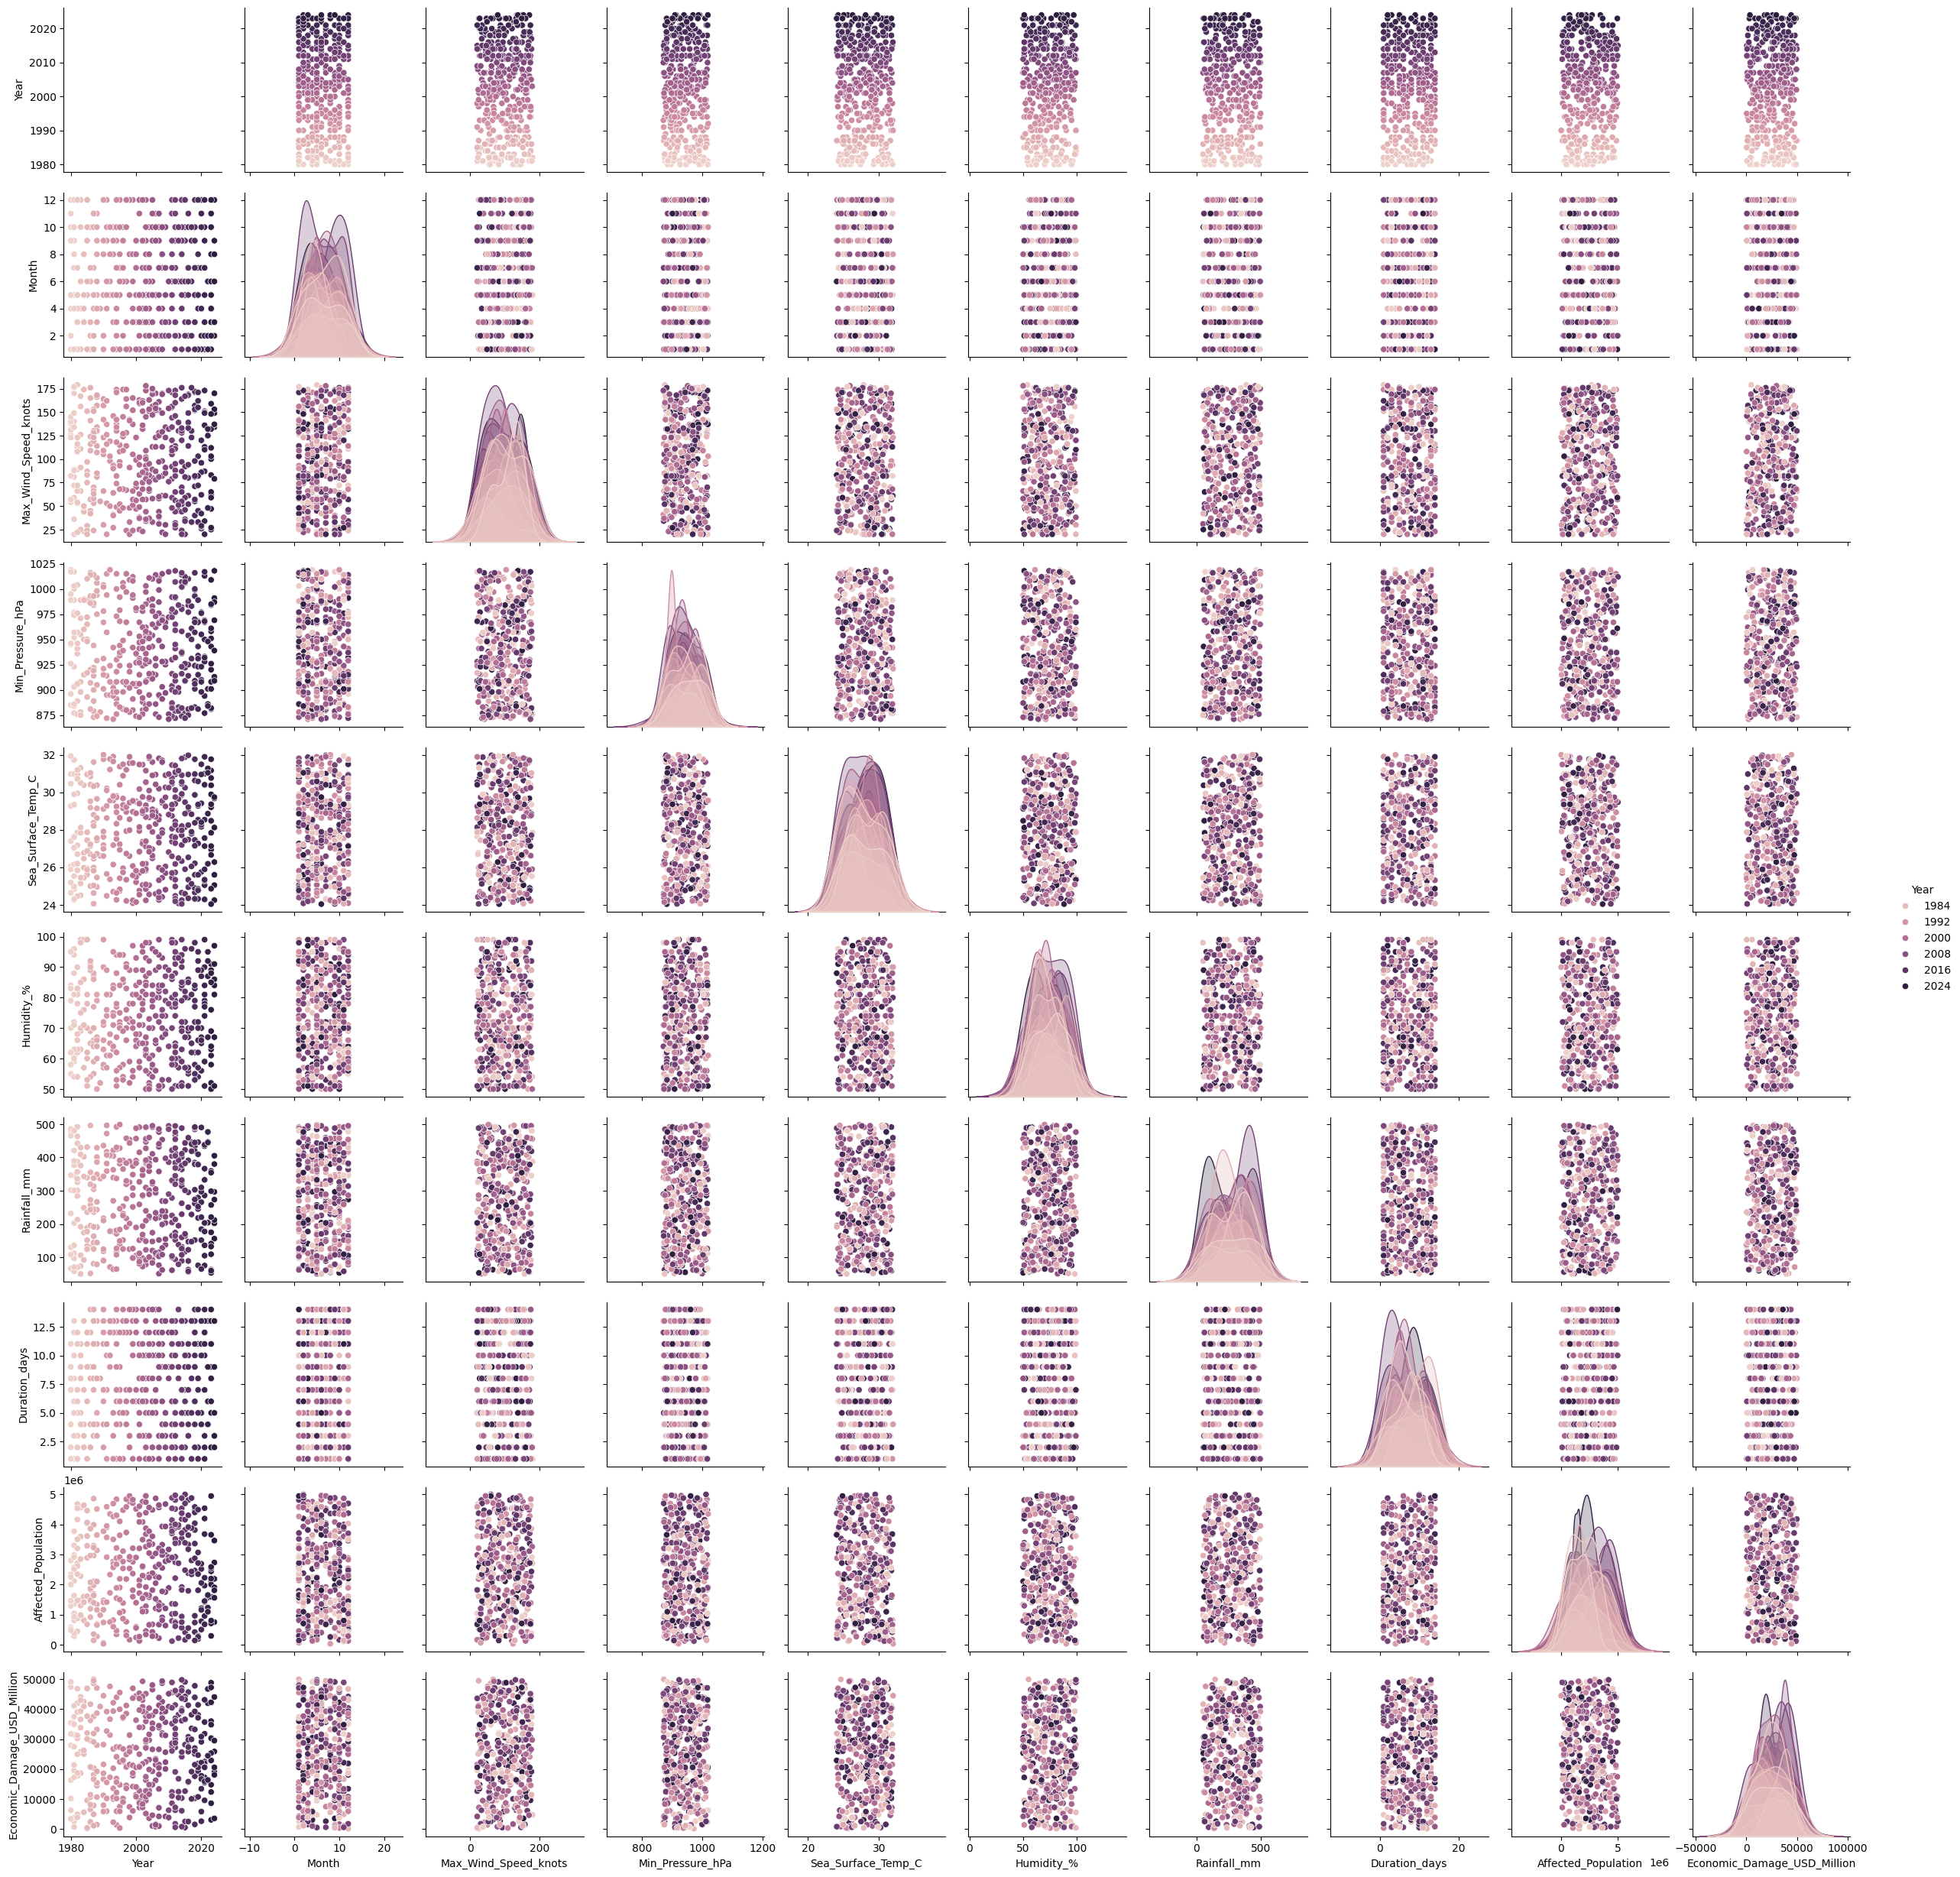

In [18]:
sns.pairplot(file, vars= num_col, hue="Year")
plt.show()

### Data Preprocessing

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
file = pd.read_csv("cyclone prediction datas.csv")

# Encode only categorical columns
le = LabelEncoder()
categorical_cols = ['Month', 'Category']   # add 'Region' or 'Basin' if present

for col in categorical_cols:
    file[col] = le.fit_transform(file[col].astype(str))

file.head()


Cyclone_ID  Year  Month  Max_Wind_Speed_knots  Min_Pressure_hPa  \
0    CYC0001  2018      7                    71               924   
1    CYC0002  2008      9                    98               972   
2    CYC0003  1994      6                    49              1000   
3    CYC0004  2022      8                   125               901   
4    CYC0005  1987      6                    70               879   

   Sea_Surface_Temp_C  Humidity_%  Rainfall_mm  Duration_days  \
0               24.66          72        484.3              4   
1               29.44          93        269.8              6   
2               29.24          51        117.8             12   
3               26.19          87        204.1             13   
4               31.61          66        236.0              3   

   Affected_Population  Economic_Damage_USD_Million  Category  
0               422280                     43869.01         2  
1               910245                     48718.87         2  
2               342207                      1385.68         2  
3              1231746                     41992.41         4  
4              3290791                     37591.09         6

### Feature Selection: 
Data Splitting into
- Train 
- Test

In [20]:
X = file[["Month", "Rainfall_mm", "Max_Wind_Speed_knots"]]
Y = file["Category"]

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

### Test and Train Data shape:

In [22]:
X_train.shape

(320, 3)

In [23]:
X_test.shape

(80, 3)

In [24]:
Y_train.shape

(320,)

In [25]:
Y_test.shape

(80,)

In [26]:
X_train

Month  Rainfall_mm  Max_Wind_Speed_knots
271      8         99.8                   137
98      10        124.4                   105
329     11        235.7                    20
82       2        410.6                    33
15       5        301.1                    53
..     ...          ...                   ...
358     11        151.9                   127
356      0        421.0                    36
300      8         51.7                    42
132     10        404.2                    94
373      8        405.1                   137

[320 rows x 3 columns]

In [27]:
X_test

Month  Rainfall_mm  Max_Wind_Speed_knots
261      6        359.1                   116
393      3        126.8                   134
378      0        269.8                    90
185      9         93.9                    32
202      1        106.8                    97
..     ...          ...                   ...
201     10         58.1                    81
32       8        428.0                   115
204      4        122.7                   139
264      6        420.3                   105
186      1        437.9                   149

[80 rows x 3 columns]

In [28]:
Y_train

271    0
98     1
329    5
82     1
15     4
      ..
358    5
356    3
300    1
132    2
373    1
Name: Category, Length: 320, dtype: int64

In [29]:
Y_test

261    0
393    5
378    0
185    3
202    1
      ..
201    0
32     5
204    3
264    4
186    5
Name: Category, Length: 80, dtype: int64

_________________________________________________________
60% (Week:2)
_________________________________________________________


### Training the Data

In [48]:
# Step 4: Train model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

### Checking Accuracy

In [56]:
Y_pred = rf.predict(X_test)
print("Model Accuracy:", accuracy_score(Y_test, Y_pred))

Model Accuracy: 0.7083333333333334


### Taking User Input

In [43]:
rainfall = float(input("Enter rainfall (mm): "))
duration = float(input("Enter duration (days): "))
humidity = float(input("Enter humidity (%): "))

### Predicting Cyclone

In [50]:
user_data = [[rainfall, duration, humidity]]
prediction = rf.predict(user_data)

if prediction[0] == 1:
    print("⚠️ Flood predicted in this area!")
else:
    print("✅ No flood predicted.")

✅ No flood predicted.


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


_________________________________________________________
100% (Week:3)
_________________________________________________________
